Projeto Fundamentos da Ciência dos Dados: Avaliações de vestuário para mulheres em E-commercer
por: Miguel Oliveira - 96200

Introdução
Ao longo deste projeto irei aplicar os conhecimentos aprendidos ao longo da unidade curricular Fundamentos da Ciência dos Dados (FCD), nomeadamente sobre manipulação, exploração, visualização e processamentos dos dados.

O trabalho vai ser dividido nas seguintes partes:

Definição do problema
Aquisição dos dados
Data Wrangling - Limpeza e manipulação do dataset de forma a obter novas variáveis para poder analisar
EDA - Análise exploratória dos dados e a sua interpretação
Modelação preditiva - Criação de algoritmos de machine learning

### 1 - Definição do problema

A possibilidade de comprar artigos de roupa online através de plataformas de e-commerce é uma realidade com a qual já
contamos há vários anos. É certo também que nem sempre é fácil escolher roupa através de um ecrã sem experimenta-la,
assim os comentários deixados por outros utilizadores que tenham anteriormente adequerido a mesma peça são
consideravelmente úteis para guiar potenciais compradores.

Estes comentários podem também ser indicadores de tendências e preferências por parte deste grupo de individuos e assim
procura-se com esta analise tentar mapear possiveis padrões de compra existentes nestas plataformas de e-commerce.

Para isso, será analisado um dataset contendo milhares destes comentários por mulheres que compraram ou procuram comprar
roupa por estas plataformas.

### 2 - Aquisição dos dados
Os dados utilizados para este trabalho foram retirados do Kaggle em https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

### 3 - Data Wrangling
Importar as bibliotecas que vamos utilizar

In [27]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Machine Learning algorithms

In [28]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [29]:
df = pd.read_csv('../data/Womens Clothing E-Commerce Reviews.csv', sep=",", encoding="utf-8")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [30]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Algumar colunas contêm dados irrelevantes para a analise e renomear algumas columas para que o seu próposito
seja mais legivel.

In [32]:
df = df.drop(['Unnamed: 0', 'Clothing ID', 'Positive Feedback Count' ], axis = 1)
df.rename(columns={'Recommended IND': 'Recommended', 'Class Name': 'Cloth Type'}, inplace=True)
df.head()

,Age,Title,Review Text,Rating,Recommended,Division Name,Department Name,Cloth Type
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


Para além disso, exitem entradas sem comentários e apenas titúlos, vamos considerar os títulos como a avaliação em si

In [ ]:
#TODO

In [33]:
df.dropna()

,Age,Title,Review Text,Rating,Recommended,Division Name,Department Name,Cloth Type
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,General,Dresses,Dresses


Vamos analisar as faixas etárias presentes

In [34]:
df['Age'].value_counts()


39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

Verifica-se que boa parte dos comentários foi feito por mulheres na casa dos 30 anos

Vamos assim agrupar os dados por faixas etárias

In [35]:
df_young = df[(df['Age'] > 18) & (df['Age'] < 30)]
df_young['Age'].count()

2927

In [36]:
df_adult = df[(df['Age'] > 30) & (df['Age'] < 45)]
df_adult['Age'].count()


10500

In [37]:
df_mid_age = df[(df['Age'] > 45) & (df['Age'] < 60)]
df_mid_age['Age'].count()


6341

In [38]:
df_old = df[(df['Age'] > 60) & (df['Age'] < 100)]
df_old['Age'].count()

2437

Nesta fase parece que mulheres de meia-idade são as mais propensas a comentar roupa em sites

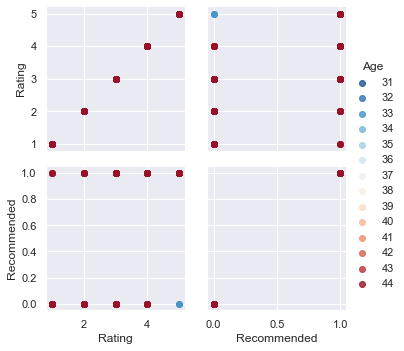

In [40]:

g = sns.PairGrid(df_adult, vars=['Rating', 'Recommended'], hue='Age', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

<AxesSubplot:ylabel='Recommended'>

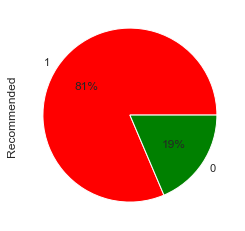

In [50]:
df_adult['Recommended'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red"])

<AxesSubplot:ylabel='Rating'>

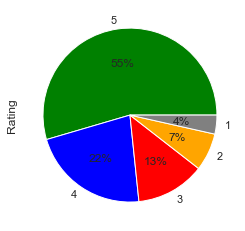

In [55]:
df_adult['Rating'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "blue", "red", "orange", "grey"])

It looks like the majority of the adult women recommend and more than 75% gave a high rating,
indicating their very satisfied with their purchases

In [ ]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

The following code divides data into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)